In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 157MB/s]
100% 1.06G/1.06G [00:06<00:00, 176MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 61s 87ms/step - loss: 0.6198 - accuracy: 0.6465 - val_loss: 0.5430 - val_accuracy: 0.7176
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4642 - accuracy: 0.7770 - val_loss: 0.4430 - val_accuracy: 0.7904
Epoch 3/10
625/625 [==============================] - 54s 87ms/step - loss: 0.3504 - accuracy: 0.8444 - val_loss: 0.5611 - val_accuracy: 0.7778
Epoch 4/10
625/625 [==============================] - 52s 82ms/step - loss: 0.2155 - accuracy: 0.9090 - val_loss: 0.7027 - val_accuracy: 0.7804
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1012 - accuracy: 0.9605 - val_loss: 1.2429 - val_accuracy: 0.7620
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0777 - accuracy: 0.9729 - val_loss: 1.4157 - val_accuracy: 0.7666
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0515 - accuracy: 0.9827 - val_loss: 1.2776 - val_accuracy:

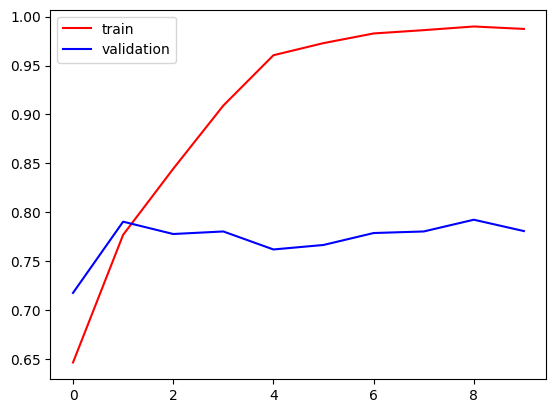

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

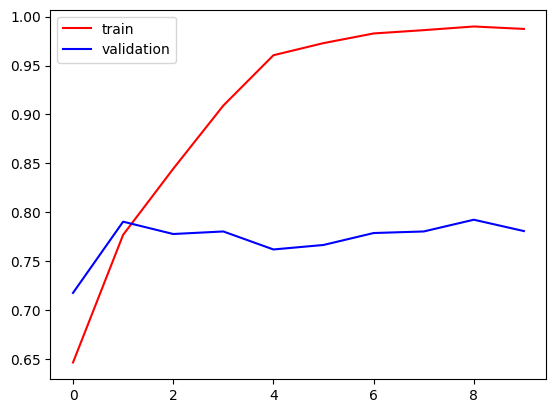

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

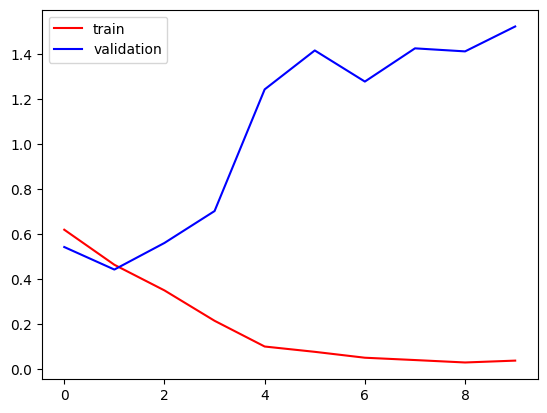

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

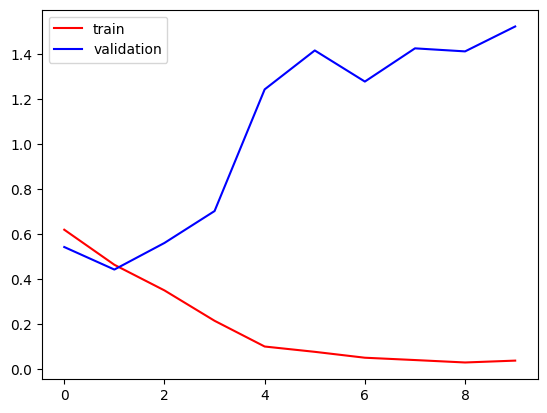

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.2277 - accuracy: 0.5404 - val_loss: 0.6817 - val_accuracy: 0.5280
Epoch 2/10
625/625 [==============================] - 68s 107ms/step - loss: 0.6437 - accuracy: 0.6181 - val_loss: 0.6077 - val_accuracy: 0.6572
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5746 - accuracy: 0.6930 - val_loss: 0.6014 - val_accuracy: 0.6674
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5158 - accuracy: 0.7344 - val_loss: 0.5284 - val_accuracy: 0.7440
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4517 - accuracy: 0.7755 - val_loss: 0.4948 - val_accuracy: 0.7676
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4076 - accuracy: 0.7928 - val_loss: 0.5123 - val_accuracy: 0.7598
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3532 - accuracy: 0.8213 - val_loss: 0.5484 - val_ac

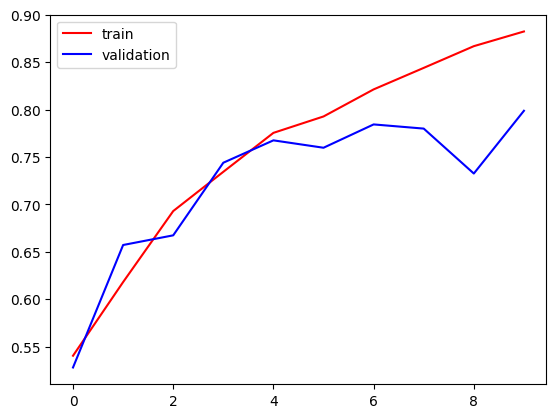

In [23]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

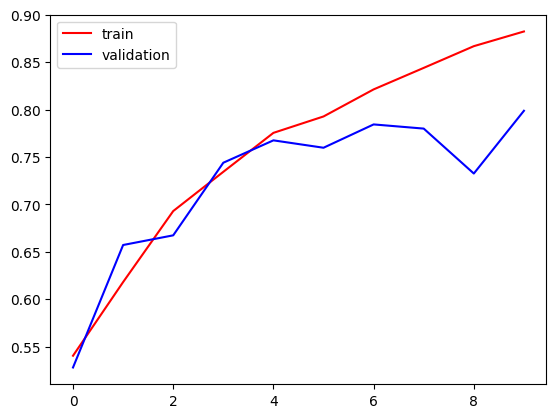

In [24]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

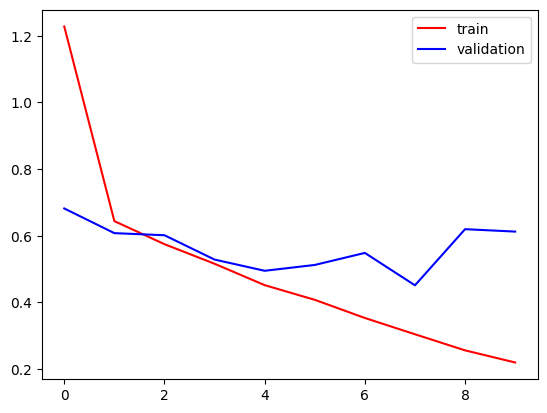

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

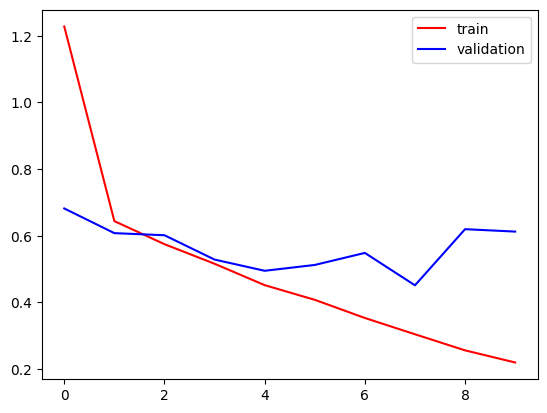

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
import cv2

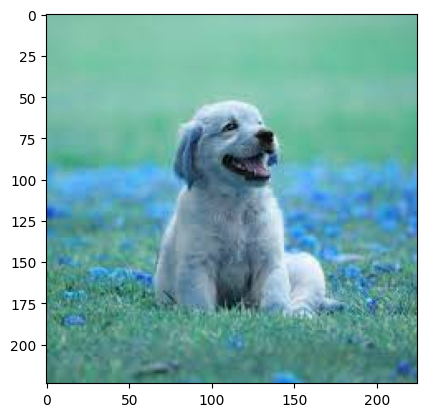

In [29]:
test_img = cv2.imread('/content/dog.jpeg')
plt.imshow(test_img)

In [30]:
test_img.shape

(224, 225, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [32]:
mod = model.predict(test_input)

1/1 [==============================] - 0s 406ms/step


In [33]:
if mod == 0:
  print("Model Predicted image as Cat")
else:
  print("Model Predicted image as Dog")

Model Predicted image as Dog
